<a href="https://colab.research.google.com/github/Samhitha1912/ML-CaPsule/blob/README.md/Role_from_Resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd  #data processing, CSV file I/O (e.g. pd.read_csv)
path="/content/drive/MyDrive/Resume_data.csv"
resume=pd.read_csv(path)

In [3]:
resume.head(10) 

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
5,11592605,HR GENERALIST Summary Dedic...,"<div class=""fontsize fontface vmargins hmargin...",HR
6,25824789,HR MANAGER Summary HUMAN RES...,"<div class=""fontsize fontface vmargins hmargin...",HR
7,15375009,HR MANAGER Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR
8,11847784,HR SPECIALIST Summary Posses...,"<div class=""fontsize fontface vmargins hmargin...",HR
9,32896934,HR CLERK Summary Translates ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# **Importing the libraries**

In [4]:
import numpy as np # linear algebra
import os, gc, re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys, email, string
import nltk
from collections import Counter
from time import perf_counter # returns the float value of time in seconds

**Dropping unused columns** 

The columns : ID and Resume_html hold no importance


In [5]:
# drop unused columns
resume.drop('ID', axis=1, inplace=True)
resume.drop('Resume_html', axis=1, inplace=True)
resume

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


# **Data Visualization**

**Creating a list of all unique categories**

In [6]:
# create list of all categories
categories = np.sort(resume['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

**Creating a new dataframe comprising of category wise data, where categories are alphabetically organized**

In [7]:
# create new df for corpus and category
df_categories = [resume[resume['Category'] == category].loc[:, ['Resume_str', 'Category']] for category in categories]
df_categories[0]

,Resume_str,Category
1808,ACCOUNTANT Professional Summary...,ACCOUNTANT
1809,ACCOUNTANT Summary Innovat...,ACCOUNTANT
1810,ACCOUNTANT Highlights ...,ACCOUNTANT
1811,ACCOUNTANT Professional Sum...,ACCOUNTANT
1812,ACCOUNTANT Summary To pursue...,ACCOUNTANT
...,...,...
1921,GENERAL ACCOUNTANT Professional...,ACCOUNTANT
1922,STAFF ACCOUNTANT Professional S...,ACCOUNTANT
1923,GENERAL ACCOUNTANT Summary ...,ACCOUNTANT
1924,PROJECT ACCOUNTANT Career F...,ACCOUNTANT


In [8]:
len(df_categories)

24

**Countplot using seaborn library**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


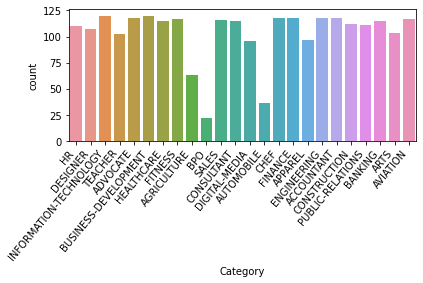

In [9]:
import seaborn as sns
p=sns.countplot(resume['Category'])
p.set_xticklabels(p.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

**Word Cloud**

*Larger the font of a word, higher is its frequency in the particular category*

In [10]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_str'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        background_color='white',
        max_words=50
    ).generate(txt)

    return wordcloud

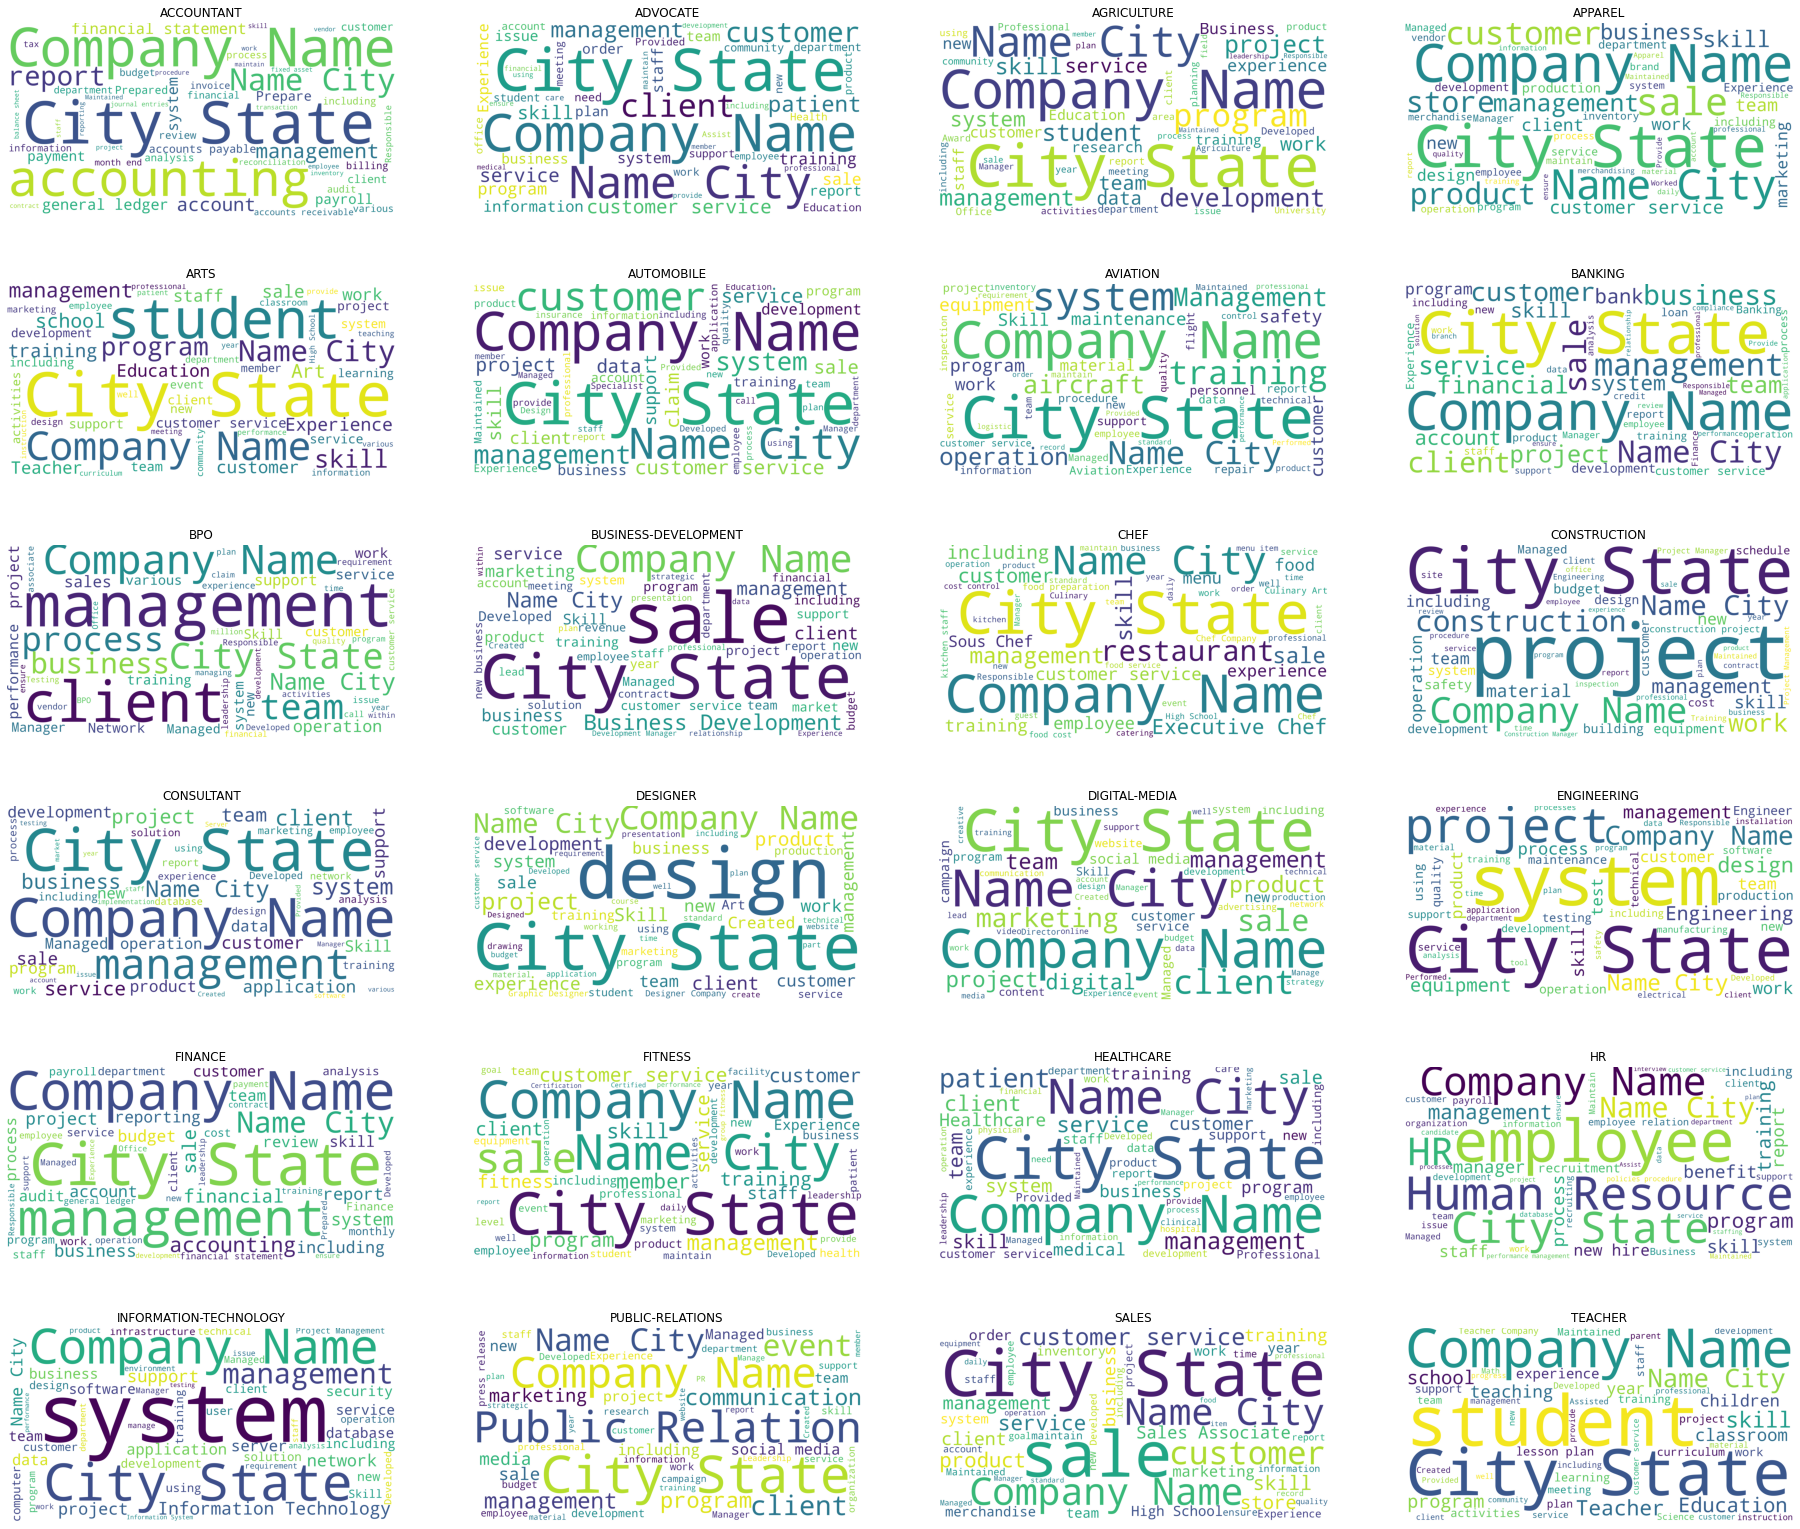

In [11]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i]) 

    plt.subplot(6, 4, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# **Data Preprocessing**

In [12]:
# to extract the stream of tokens with the help of regular expressions
from nltk.tokenize import RegexpTokenizer

In [13]:
def preprocess(text):
    # convert all characters in the string to lower case
    text = text.lower()
    # remove non-english characters, punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # tokenize word
    text = nltk.tokenize.word_tokenize(text)
    # remove stop words
    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]

    return ' '.join(text)

In [14]:
# downloading packages needed for data preprocessing
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# preprocessing text and storing it in new column 'Resume'
resume['Resume'] = resume['Resume_str'].apply(lambda w: preprocess(w))
# drop original text column
resume.drop('Resume_str', axis=1, inplace=True)

**Removing words that occur frequently in most of the categories, hence don't hold importance**

Observation made from Word Cloud

In [16]:
resume['Resume']=resume['Resume'].str.replace("city",'') # replacing occurance of city with a space
resume['Resume']=resume['Resume'].str.replace('state','') # replacing occurance of state with a space
resume['Resume']=resume['Resume'].str.replace('management','') # replacing occurance of management with a space
resume['Resume']=resume['Resume'].str.replace('name','') # replacing occurance of name with a space

In [17]:
resume.head(1000)

,Category,Resume
0,HR,hr administrator marketing associate hr admini...
1,HR,hr specialist us hr operations summary versati...
2,HR,hr director summary years experience recruitin...
3,HR,hr specialist summary dedicated driven dynamic...
4,HR,hr manager skill highlights hr skills hr depar...
...,...,...
995,SALES,sales summary looking career position company ...
996,SALES,sales summary self motivated individual offeri...
997,SALES,sales summary general sales manager offering y...
998,SALES,sales professional summary graduated earle hig...


**Replacing the text in dataframe with the cleaned text**

In [18]:
df_categories = [resume[resume['Category'] == category].loc[:, ['Resume']] for category in categories]

**Word frequency plot**

*Frequency of occurance of words, category-wise*

In [19]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

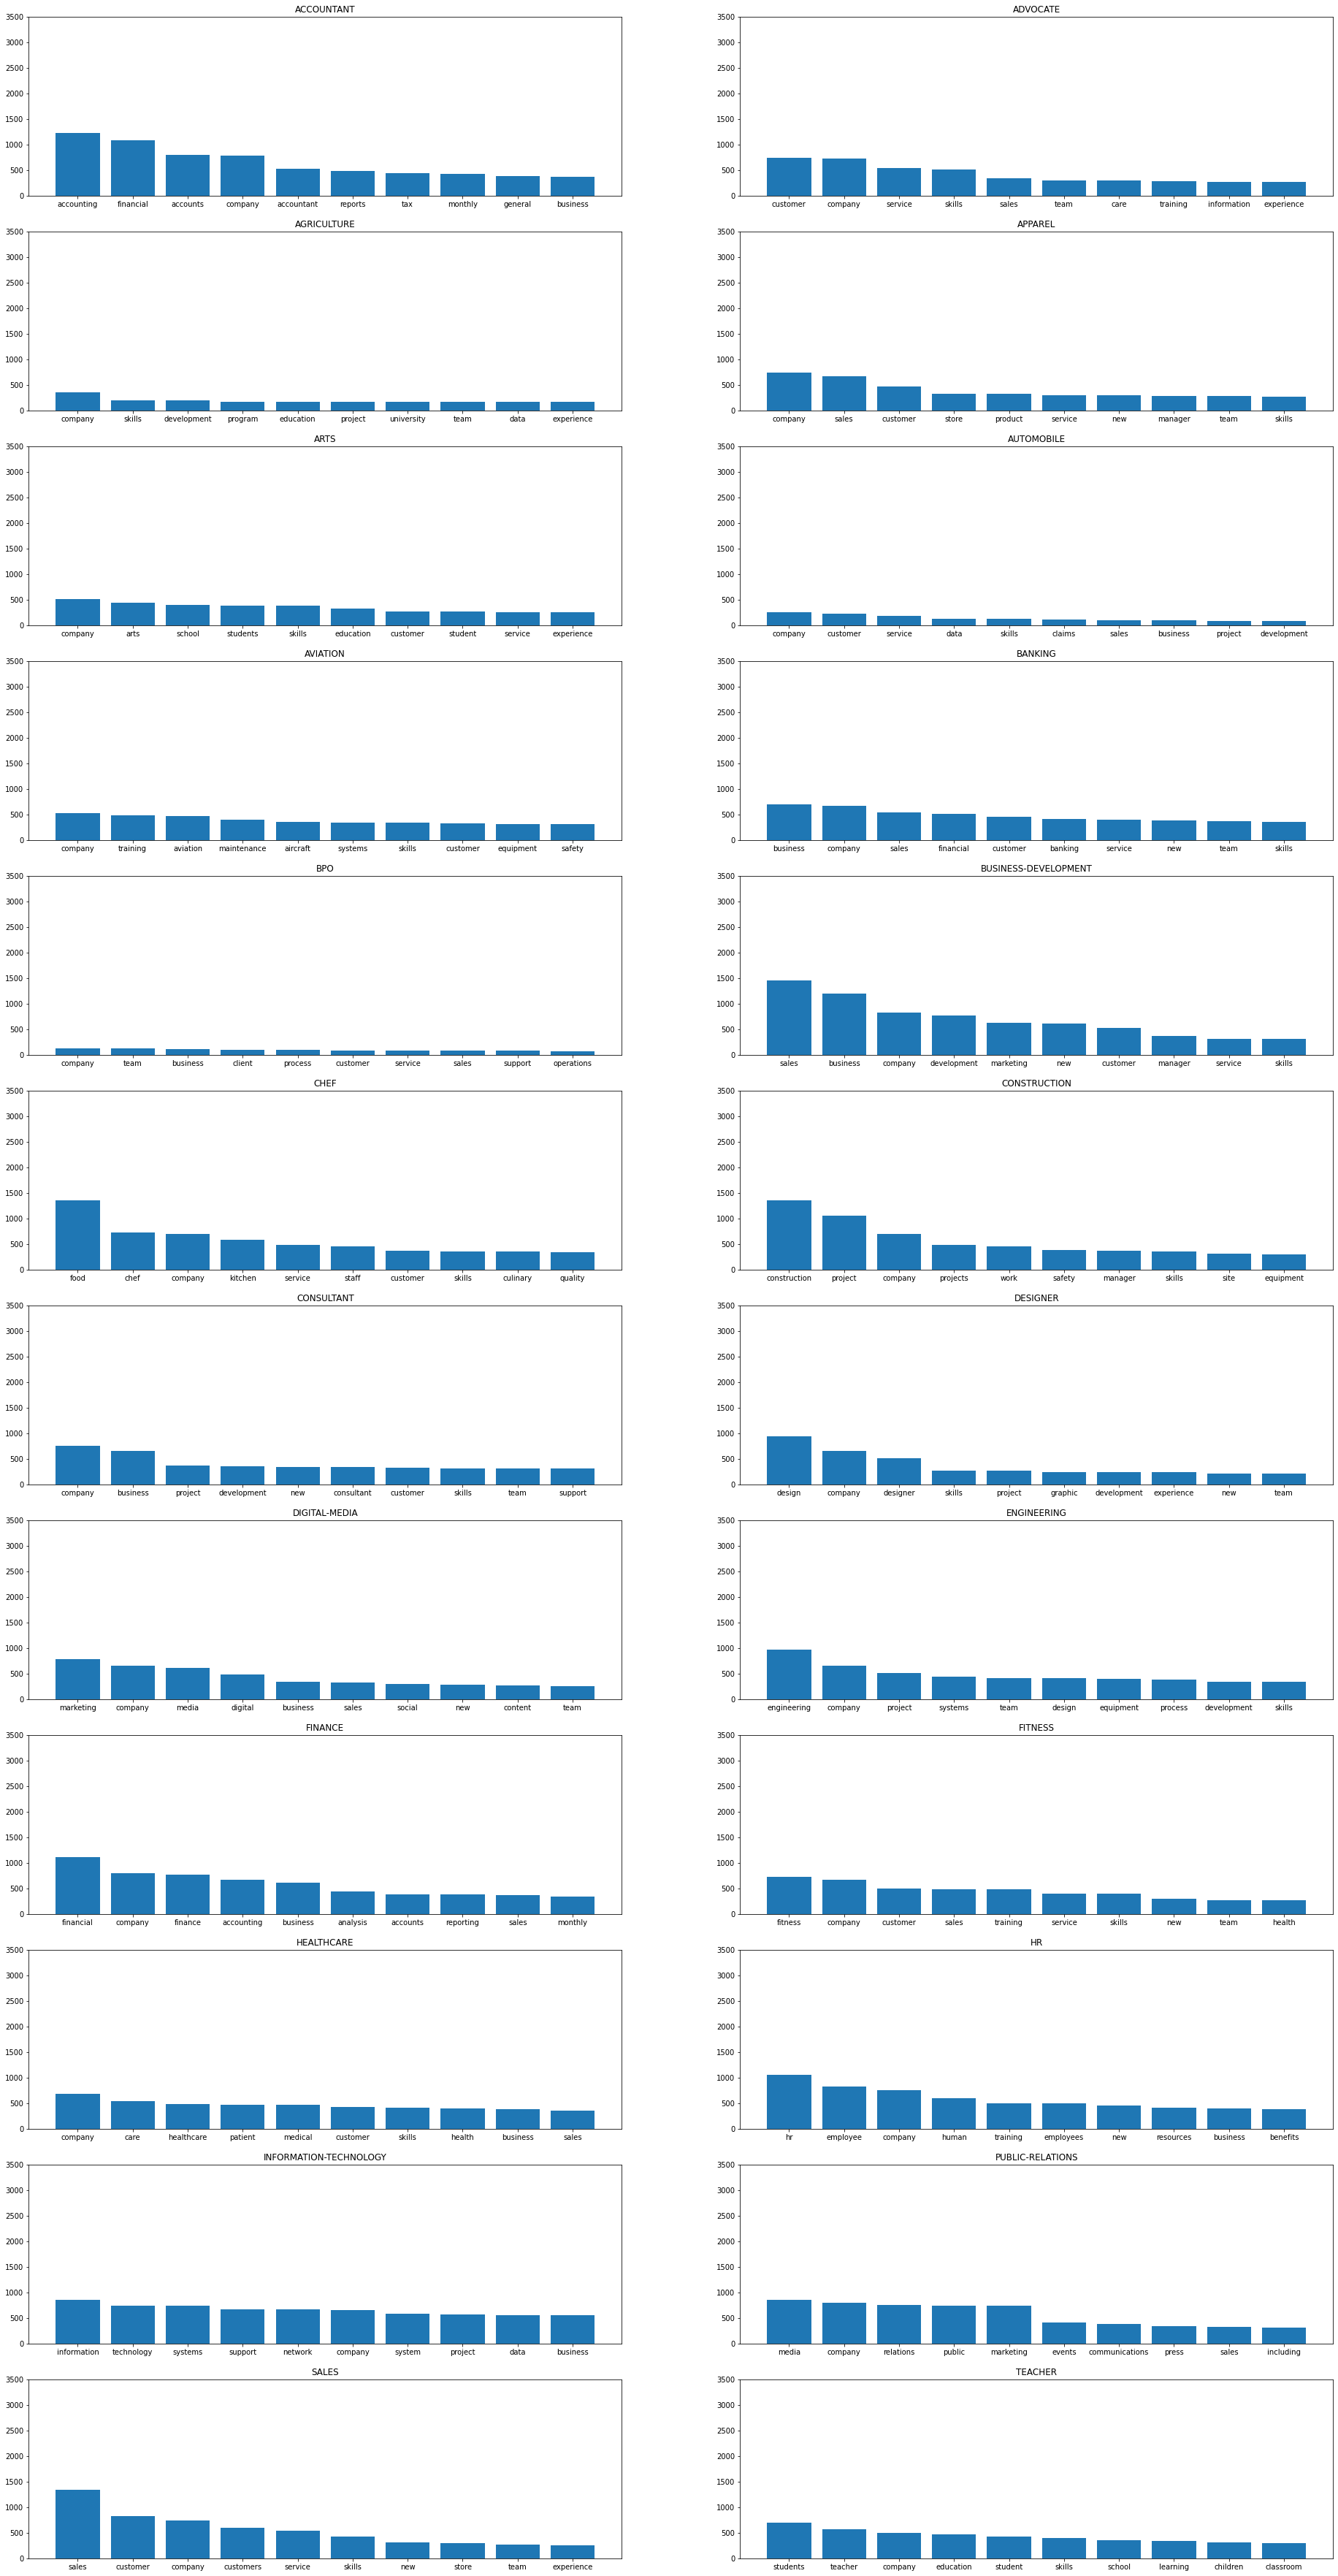

In [20]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i]) 

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

**Converting text of Resume into numerical data**

In [21]:
x= resume['Resume']
y= resume['Category']

In [22]:
print(x[0])

hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service  respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team  marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time  leadership performance assessment experience hr administrator marketing associate hr administrator dec current company    helps develop policies directs coordinates activities e

**Count Vectorizer**

*Transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text*

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)

In [24]:
x.shape

(2484, 37525)

In [25]:
print(x[0]) # words in the form of vector 

  (0, 15722)	4
  (0, 591)	4
  (0, 20310)	13
  (0, 2391)	3
  (0, 32518)	1
  (0, 8796)	1
  (0, 8312)	13
  (0, 30208)	9
  (0, 20105)	4
  (0, 37323)	1
  (0, 12080)	2
  (0, 15644)	2
  (0, 28401)	1
  (0, 4576)	1
  (0, 18918)	1
  (0, 13114)	2
  (0, 33241)	1
  (0, 32247)	1
  (0, 16916)	1
  (0, 30367)	1
  (0, 11362)	1
  (0, 6756)	1
  (0, 15348)	1
  (0, 29520)	1
  (0, 33232)	1
  :	:
  (0, 20529)	1
  (0, 26173)	1
  (0, 16997)	1
  (0, 7555)	1
  (0, 2617)	1
  (0, 10730)	1
  (0, 4663)	2
  (0, 585)	2
  (0, 17744)	2
  (0, 6605)	3
  (0, 29704)	1
  (0, 9574)	1
  (0, 26046)	1
  (0, 32288)	1
  (0, 29335)	1
  (0, 13952)	1
  (0, 30110)	1
  (0, 2811)	1
  (0, 1396)	1
  (0, 30587)	1
  (0, 29699)	1
  (0, 643)	1
  (0, 18871)	1
  (0, 25764)	1
  (0, 26098)	1


# **Training and Testing data**

**Splitting data into training and testing data**

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state =20) # 80% data for training and 20% data for testing

In [27]:
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1987, 37525)
Testing X Shape: (497, 37525)


# **Logistic Regression**

In [28]:
Accuracy=[]
Duration=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
start = perf_counter() # start the timer at the beginning of model training
logreg=LogisticRegression(solver='liblinear')
logreg=logreg.fit(x_train,y_train)
prediction=logreg.predict(x_test)
Accuracy.append(accuracy_score(prediction,y_test))
print(Accuracy[0])

duration = perf_counter() - start # to determine total time needed for training the model
duration = round(duration,2)
Duration.append(duration)
print(Duration[0])

0.6861167002012073
6.18


# **Multinomial Naive Bayes**

 Multinomial NB: *Used for the analysis of the categorical text data*

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
start = perf_counter() # start the timer at the beginning of model training
clf = MultinomialNB()
clf.fit(x_train, y_train)
naive_predict=clf.predict(x_test)
Accuracy.append(accuracy_score(naive_predict,y_test))
print(Accuracy[1])
duration = perf_counter() - start # to determine total time needed for training the model
duration = round(duration,2)
Duration.append(duration)
print(Duration[1])

0.545271629778672
0.07


# **Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
start = perf_counter() # start the timer at the beginning of model training
forest_clf = RandomForestClassifier(max_depth=19, random_state=0)
forest_clf.fit(x_train,y_train)
ran_pred=forest_clf.predict(x_test)
Accuracy.append(accuracy_score(ran_pred,y_test))
print(Accuracy[2])
duration = perf_counter() - start # to determine total time needed for training the model
duration = round(duration,2)
Duration.append(duration)
print(Duration[2])

0.5995975855130785
1.78


# **Desicion Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
start = perf_counter() # start the timer at the beginning of model training
tree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
tree.fit(x_train,y_train)
ran=tree.predict(x_test)
Accuracy.append(accuracy_score(ran,y_test))
print(Accuracy[3])
duration = perf_counter() - start # to determine total time needed for training the model
duration = round(duration,2)
Duration.append(duration)
print(Duration[3])

0.5150905432595574
2.68


**Comparing accuracy and training time for each model**

In [32]:
model=["LogisticRegression", "MultinomialNB","RandomForestClassifier", "DecisionTreeClassifier"]
models_acc = []
for i in range(0,4):
    models_acc.append([model[i],Accuracy[i],Duration[i]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,LogisticRegression,0.686117,6.18
1,RandomForestClassifier,0.599598,1.78
2,MultinomialNB,0.545272,0.07
3,DecisionTreeClassifier,0.515091,2.68


**Plot of model accuracies**

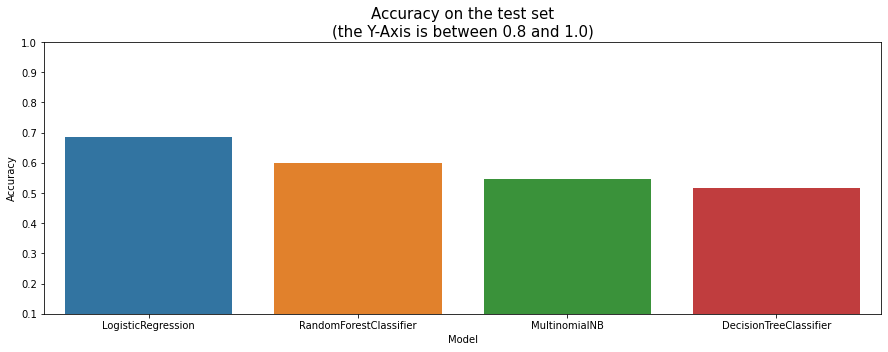

In [33]:
import seaborn as sns
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.1,1)
plt.show()

**Plot of model training time**

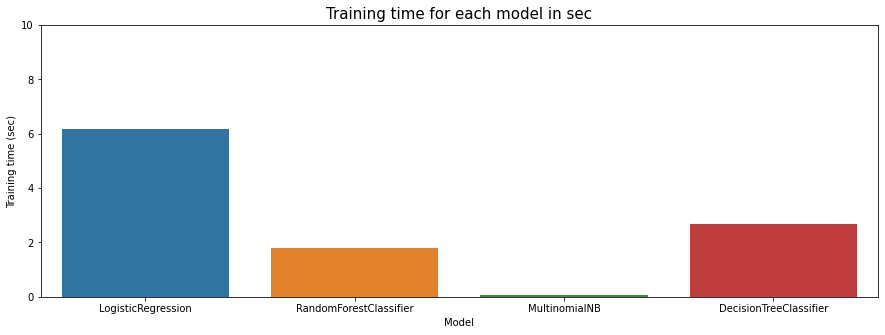

In [34]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,10)
plt.show()